In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import joblib
from tkinter import * 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve


In [2]:

def plot_confusion_matrix(y_test, y_pred,modelname):
    '''
    This function read the true outcome and the predicted outcome,
    and draw a confusion matrix of specific model

    **Parameters**
        y_test: *array*
            The real outcome
        y_pred: *array*
            The predicted outcome
        modelname: *str*
            The name of model

    **Return**
        None
    '''
    # calculate the confusion matrix based on different model 
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap='GnBu', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large') 
    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Confusion Matrix: %s '% modelname, fontsize=12)
    fig.savefig('Figure/%s_confusion_matrix.png' % modelname)


def ROC_curve(y_test, y_pred_proba,modelname):
    '''
    This function read the true outcome and the probablity of the positive predicted outcomes,
    and draw a ROC curve of specific model

    **Parameters**
        y_test: *array*
            The real outcome
        y_pred_proba: *array*
            The probablity of the positive predicted outcomes
        modelname: *str*
            The name of model

    **Return**
        None
    '''
    # calculate the false positive rate and true positive rate of model
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
    # calculate the auc value of model
    roc_auc = auc(fpr, tpr)
    fig = plt.figure()
    plt.plot(fpr, tpr, 'b', label = '%s (AUC = %0.2f)' % (modelname,roc_auc))
    #plot the ROC curve and calculate AUC
    plt.plot([0, 1], [0, 1],'r--', label='No Skill Classifier')
    #plot the 'No Skill Classifier' curve
    plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='perfect performance')
    #Plot the 'perfect performance' curve
    plt.legend(loc = 'lower right')
    plt.title('ROC Curve: %s '% modelname)
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.xlabel('False Positive Rate (1-specificity)')
    fig.savefig("Figure/%s_ROC_curve.png" % modelname)
    

def PR_curve(y_test, y_pred_proba,modelname):
    '''
    This function read the true outcome and the probablity of the positive predicted outcomes,
    and draw a ROC curve of specific model

    **Parameters**
        y_test: *array*
            The real outcome
        y_pred_proba: *array*
            The probablity of the positive predicted outcomes
        modelname: *str*
            The name of model

    **Return**
        None
    '''
    precision, recall, _= precision_recall_curve(y_test,y_pred_proba[:,1])
    #calculate precision and recall
    no_skill = len(y_test[y_test==1]) / len(y_test)
    fig = plt.figure()
    plt.plot(recall, precision, marker='.', label='%s ' % modelname)
    #plot PR curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill Classifier')
    #plot 'No Skill Classifier' curve
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve: %s '% modelname)
    plt.legend()
    fig.savefig("Figure/%s_PR_curve.png" % modelname)


def Scores(y_test,y_pred,y_pred_proba,modelname):
    '''
    This function read the true outcome, the predicted outcome 
    and the probablity of the positive predicted outcomes. 
    Then, it give back the precison, recall, F1 score and the ROC-AUC score of the model.

    **Parameters**
        y_test: *array*
            The real outcome
        y_pred: *array*
            The predicted outcomes
        y_pred_proba: *array*
            The probablity of the positive predicted outcomes
        modelname: *str*
            The name of model

    **Return**
        None
    '''
    print('----------------------------')
    print('This is %s'% modelname)
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    #Calculate the scores by test set and probability estimates provided by the predict_pred
    print('ROC-AUC Score: %.3f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    #Calculate the ROC-AUC score by test set result probability estimates provided by the predict_proba
    return None
    

def plot_learning_curve(dataset, estimator,modelname):
    '''
    This function read the dataset and give back its learning curve based on specific model.

    **Parameters**
        dataset: *dataframe*
            The dataframe used for model fitting
        estimator: *array*
            The fitting model
        modelname: *str*
            The name of model

    **Return**
        None
    '''
    x=dataset.drop(columns='HeartDisease')
    #Dataset except target
    y=dataset['HeartDisease']
    #Dataset of target
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y)
    #Number of samples in training set, score if training set, score of test set
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #Mean of test set scores
    test_scores_std = np.std(test_scores, axis=1)
    #Standard deviation of test scores
    fig = plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title('Learning Curve: %s '% modelname, fontsize='small')
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b") 
    #Plot the learning curve with upper and lower limits of training score
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
    #Plot the learning curve with upper and lower limits of test score
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    #Plot learning curve
    plt.legend(loc="best")
    fig.savefig("Figure/%s_Learning_curve.png" % modelname)


def RandomForest(dataset):
    '''
    This function read a dataset and train it on random forest model.

    **Parameters**
        dataset: *dataframe*
            The addressed dataframe

    **Return**
        None
    '''
    X = dataset.drop(['Category'], axis=1)
    #Dataset except target
    Y = dataset['Category']
    #Dataset of target
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
    #Split data to training set and test set
    transfer = StandardScaler()
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.fit_transform(x_test)
    #Feature scaling
    rf = RandomForestClassifier(n_estimators=10, n_jobs=2)
    rf.fit(x_train,y_train)
    #Fit the model to training set
    y_pred=rf.predict(x_test)
    #Predict the result of test set
    y_pred_proba=rf.predict_proba(x_test)
    #Predict the result of test set to plot ROC and calculate AUC
    #joblib.dump(rf, "Model/rf_model.joblib" ,compress=1)
    plot_confusion_matrix(y_test,y_pred,'RandomForest')
    ROC_curve(y_test, y_pred_proba,'RandomForest')
    PR_curve(y_test, y_pred_proba,'RandomForest')
    plot_learning_curve(dataset,rf,'RandomForest')
    Scores(y_test,y_pred,y_pred_proba,'RandomForest')
    return y_test, y_pred, y_pred_proba


FileNotFoundError: [Errno 2] No such file or directory: 'Figure/RandomForest_confusion_matrix.png'

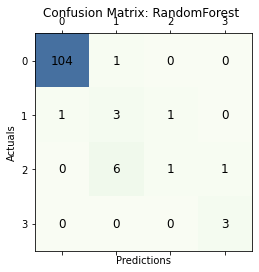

In [3]:
df = pd.read_csv('preprocesseddata.csv').drop(['Unnamed: 0'], axis=1)

RandomForest(df)
df

In [12]:
X = pd.get_dummies(df.iloc[:, 1:], drop_first=True).values.astype('float')
X
print(np.shape(X))

(601, 12)


In [11]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,3,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
597,3,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
598,3,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
599,3,46,0,33.0,93.220833,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


 ## Multi class logistic regression

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

le = LabelEncoder()
sc = StandardScaler()

X = pd.get_dummies(df.iloc[:, 1:], drop_first=True).values.astype('float')
y = le.fit_transform(df.iloc[:, 0].values).astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)